In [94]:
# look at the sea level pressure diag file
# initial built: 2024/07/17
import numpy as np
import matplotlib.pyplot as plt
import netCDF4 as nc
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy
print(cartopy.__version__)

0.21.1


In [95]:
exps = ['bc0_inf','bc0_noinf','bc1_inf','bc1_noinf']
fn={};

for exp in exps:
    fn[exp] = f'/scratch2/GFDL/gfdlscr/Chih-Chi.Hu/scrub/varBC_exp_new/new_ctrl_amsua_atms_{exp}_single/gdas.20220701/00/atmos/cnvstat_tmp/diag_conv_ps_anl.2022070100.nc4'
    

In [96]:
lat={}; lon={}; height={};
qc={}; ause={}; omfadj={};
for i,exp in enumerate(exps):
    fnc = nc.Dataset(fn[exp])
    qc[exp] = fnc.variables['Prep_QC_Mark'][:]       
    lon[exp]    = fnc.variables['Longitude'][:]
    lat[exp]    = fnc.variables['Latitude'][:]
    height[exp] = fnc.variables['Height'][:]   
    ause[exp]   = fnc.variables['Analysis_Use_Flag'][:]
    omfadj[exp] = fnc.variables['Obs_Minus_Forecast_adjusted'][:]
    #puse[exp]   = fnc.variables['Prep_Use_Flag'][:]  
    #elev[exp]   = fnc.variables['Station_Elevation'][:]
    #pres[exp]   = fnc.variables['Pressure'][:] 
    #omf[exp]    = fnc.variables['Obs_Minus_Forecast_unadjusted'][:]
    
    fnc.close()

In [97]:
# select data
select  = (qc['bc0_inf'] <= 4) 

lons={}; lats={}; hs={}; omfs={};
for exp in exps:
    lons[exp] = lon[exp][select]
    lats[exp] = lat[exp][select]
    hs[exp]   = height[exp][select]
    omfs[exp] = omfadj[exp][select]

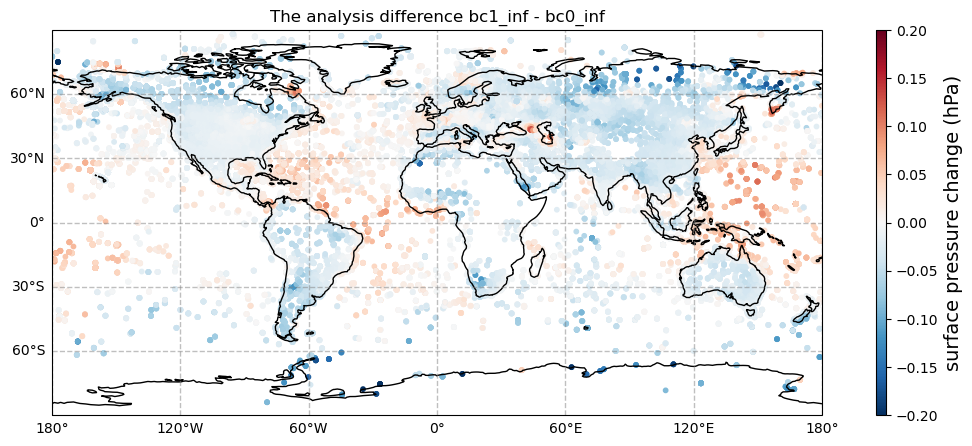

In [98]:
# difference between 2 analysis
exptest = 'bc1_inf'
expref  = 'bc0_inf'

pltvar = omfs[expref] - omfs[exptest]

fig = plt.figure(figsize=(14,5))
ax = fig.add_subplot(projection=ccrs.PlateCarree())

ax.coastlines()
scatter1 = ax.scatter(lons[exp], lats[exp], c=pltvar, s=10, vmin=-0.2, vmax=0.2, cmap='RdBu_r')
gl = ax.gridlines(draw_labels=True, linewidth=1, color='gray', alpha=0.5, linestyle='--')
gl.top_labels = False  # Hide labels on the top side
gl.right_labels = False  # Hide labels on the right side
ax.set_title(f'The analysis difference {exptest} - {expref}')
cbar = fig.colorbar(scatter1,location='right',aspect=40)
cbar.set_label('surface pressure change (hPa)', fontsize=14)

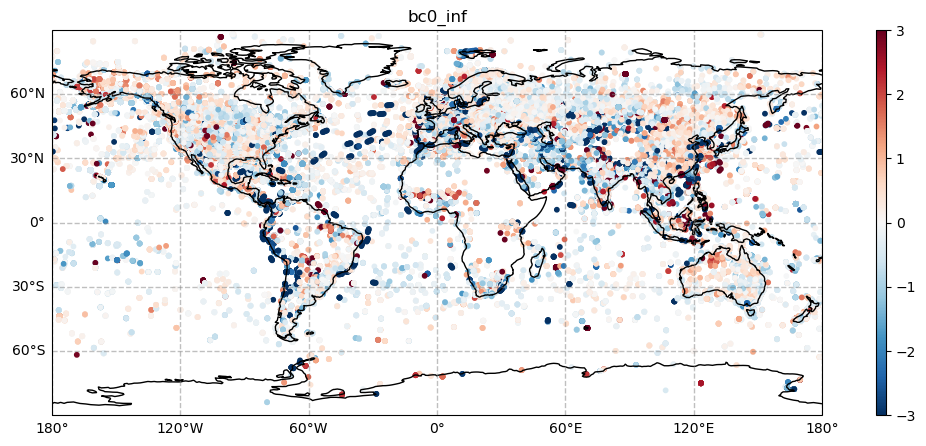

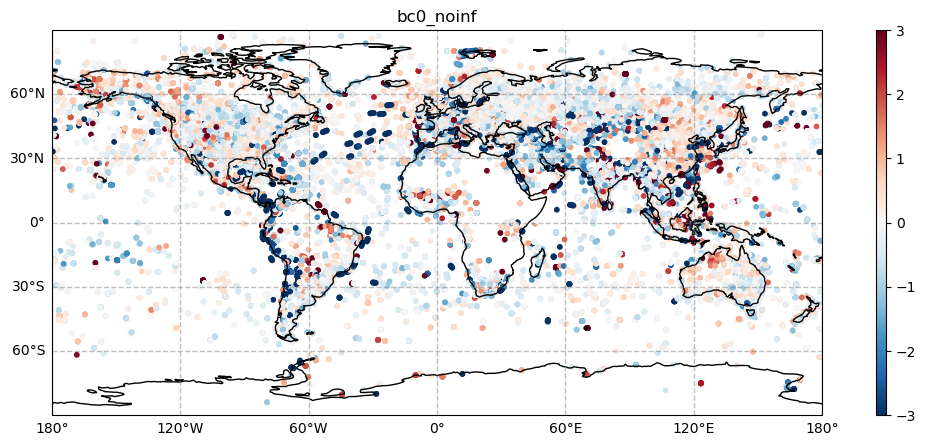

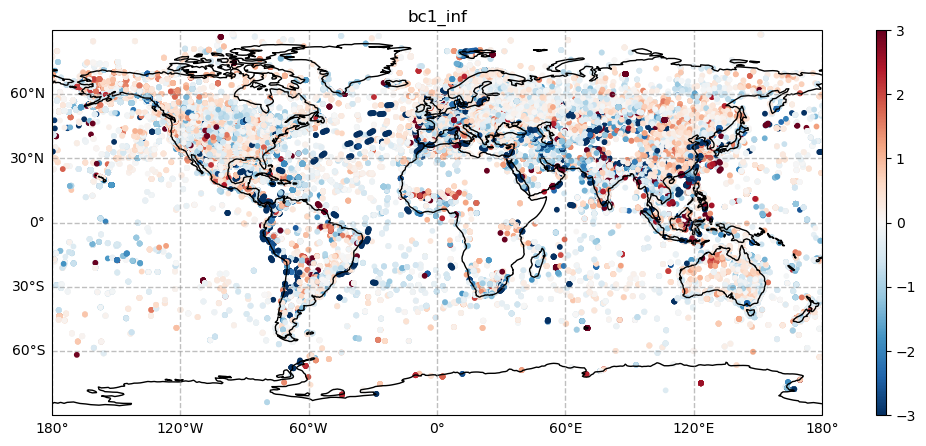

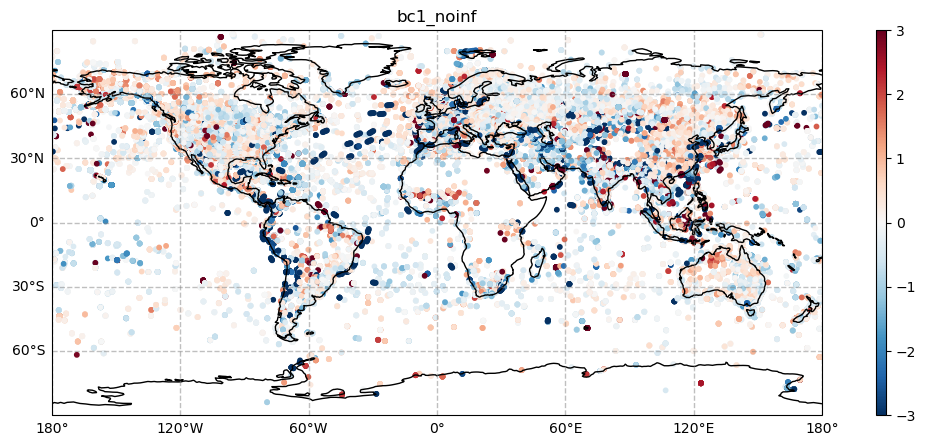

In [83]:
# Plot O-A for all experiments

for exp in exps:
    fig = plt.figure(figsize=(14,5))
    ax = fig.add_subplot(projection=ccrs.PlateCarree())

    ax.coastlines()
    scatter1 = ax.scatter(lons[exp], lats[exp], c=omfs[exp], s=10, vmin=-3, vmax=3, cmap='RdBu_r')
    gl = ax.gridlines(draw_labels=True, linewidth=1, color='gray', alpha=0.5, linestyle='--')
    gl.top_labels = False  # Hide labels on the top side
    gl.right_labels = False  # Hide labels on the right side
    ax.set_title(f'{exp}')
    cbar = fig.colorbar(scatter1,location='right',aspect=40)
    #cbar.set_label('varBC inc (K)', fontsize=14)

In [76]:
np.std(omfs['bc0_inf'])

2.4158394

In [77]:
np.std(omfs['bc1_inf'])

2.4163644

In [78]:
np.std(omfs['bc0_noinf'])

2.4158547

In [79]:
np.std(omfs['bc1_noinf'])

2.4162843

(array([102232.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,   7033.]),
 array([  0.        ,  10.10000038,  20.20000076,  30.29999924,
         40.40000153,  50.5       ,  60.59999847,  70.69999695,
         80.80000305,  90.90000153, 101.        ]),
 <BarContainer object of 10 artists>)

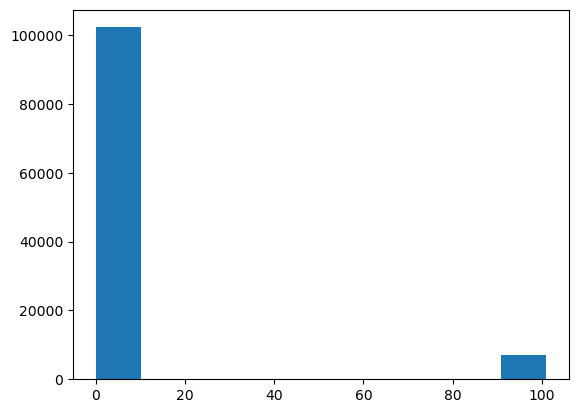

In [26]:
exptest = 'bc0_inf'

'''
bin_edges = np.arange(700, 1050 + 10, 10)
plt.hist(pres[exptest][:], bins=bin_edges)

bin_edges = np.arange(0, 2000 + 50, 50)
plt.hist(height[exptest][:], bins=bin_edges)

bin_edges = np.arange(0, 2000 + 50, 50)
plt.hist(elev[exptest][:], bins=bin_edges)
'''

plt.hist(puse[exptest][:])


(array([9.0000e+00, 6.0000e+00, 1.4000e+01, 8.0000e+00, 9.0000e+00,
        2.9000e+01, 1.6000e+01, 2.0000e+01, 3.0000e+01, 3.1000e+01,
        4.3000e+01, 4.5000e+01, 3.9000e+01, 4.7000e+01, 5.3000e+01,
        9.4000e+01, 9.4000e+01, 9.2000e+01, 9.7000e+01, 9.1000e+01,
        1.0200e+02, 1.3200e+02, 1.4500e+02, 1.6600e+02, 1.9100e+02,
        2.5900e+02, 2.2000e+02, 2.6700e+02, 3.0000e+02, 3.9900e+02,
        4.4900e+02, 5.7900e+02, 8.4200e+02, 1.4310e+03, 2.2380e+03,
        3.4810e+03, 5.2420e+03, 8.1140e+03, 1.1207e+04, 1.4018e+04,
        1.4964e+04, 1.3496e+04, 9.9120e+03, 6.6040e+03, 4.4010e+03,
        2.7330e+03, 1.7670e+03, 1.1010e+03, 6.5100e+02, 4.1000e+02,
        2.7800e+02, 1.8600e+02, 1.3600e+02, 1.2000e+02, 1.0100e+02,
        9.3000e+01, 8.9000e+01, 5.0000e+01, 4.9000e+01, 3.4000e+01,
        2.0000e+01, 1.9000e+01, 1.5000e+01, 1.9000e+01, 1.9000e+01,
        3.0000e+01, 2.3000e+01, 1.9000e+01, 2.7000e+01, 2.1000e+01,
        2.1000e+01, 2.3000e+01, 2.5000e+01, 1.00

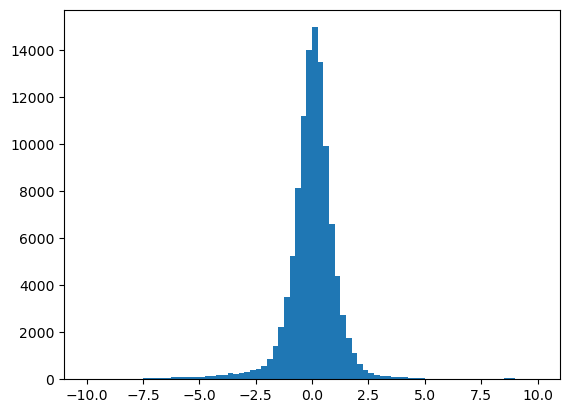

In [34]:
#plt.hist(omfadj[exptest] - omf[exptest])
bin_edges = np.arange(-10, 10 + .25, .25)

plt.hist(omfadj[exptest], bins=bin_edges)


(array([  25.,   34.,   29.,   13.,   14.,   33.,   63.,   53.,   43.,
          45.,   37.,   45.,   56.,   42.,   36.,   41.,   52.,   61.,
          57.,   47.,   44.,   65.,   72.,   70.,   84.,   54.,   86.,
          80.,   61.,   69.,   71.,  116.,  127.,   91.,   86.,  162.,
         164.,  188.,  174.,  227.,  216.,  264.,  266.,  248.,  281.,
         389.,  427.,  512.,  567.,  652.,  856.,  929., 1053., 1035.,
        1186., 1472., 2168., 2890., 3925., 6443., 6991., 5398., 4344.,
        3911., 3603., 2965., 2514., 2212., 1812., 1628., 1557., 1499.,
        1413., 1254., 1186., 1197., 1096.,  922.,  863.,  938.,  878.,
         850.,  837.,  778.,  737.,  684.,  615.,  602.,  608.,  628.,
         643.,  548.,  517.,  484.,  593.,  537.,  538.,  466.,  537.,
         475.,  465.,  476.,  413.,  375.,  422.,  406.,  337.,  375.,
         364.,  310.,  303.,  299.,  456.,  410.,  324.,  318.,  245.,
         177.,  252.,  251.]),
 array([-30. , -29.5, -29. , -28.5, -28. , -27

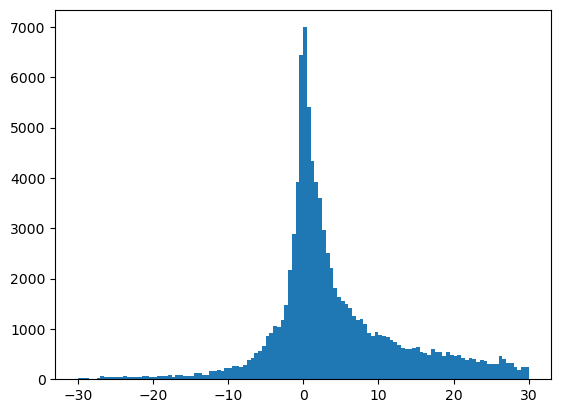

In [37]:
bin_edges = np.arange(-30, 30 + .5, .5)
plt.hist(omf[exptest], bins=bin_edges)
